# Introduction to Regression in Neural Network with Tensorflow

In [2]:
import tensorflow as tf

tf.__version__

'2.16.1'

In [3]:
devices = tf.config.list_physical_devices()
print("\nDevices: ", devices)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  details = tf.config.experimental.get_device_details(gpus[0])
  print("GPU details: ", details)


Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU details:  {'device_name': 'METAL'}


## Creating Data to view and fit

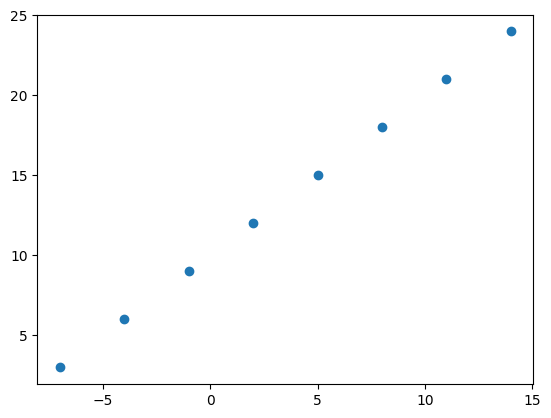

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0,9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)


In [5]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Inputs and outputs shapes

In [6]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2025-09-17 19:11:03.194948: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-17 19:11:03.195004: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-09-17 19:11:03.195036: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-09-17 19:11:03.195125: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-17 19:11:03.195152: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling in Tensorflow

* 1. Creating a model
* 2. Compiling a model
* 3. Fitting a model

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(), # or write "SGD", # stochastic gradient descent
              metrics=["mae"])

#3. Fit the model
# model.fit(X, y, epochs= 5) # This is before tensorflow 2.7
#Now we need the following fix:
model.fit(tf.expand_dims(X, axis=-1), y, epochs= 100)

Epoch 1/100


2025-09-17 19:11:06.676774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7.8258 - mae: 7.8258
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.6933 - mae: 7.6933
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.5608 - mae: 7.5608
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.4775 - mae: 7.4775
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.4719 - mae: 7.4719
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.4662 - mae: 7.4662
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.4606 - mae: 7.4606
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.4550 - mae: 7.4550
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.4494 - mae: 7.4494
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.4437 - mae: 7.4437
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.4381 - mae: 7.4381
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.4325 - mae: 7.4325
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.42

In [9]:
## Another way of writing a model with Sequential

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [10]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# Try to make a prediction with our model

model.predict(tf.constant([20.0]))

# Not very accurate.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[34.262974]], dtype=float32)

### Improving the model

In [12]:
# New model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
              metrics = ["mae"])
model.fit(tf.expand_dims(X,axis=-1), y, epochs= 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.6164 - mae: 13.6164
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.6806 - mae: 10.6806
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.6648 - mae: 7.6648
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.0709 - mae: 4.0709
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 5.9509 - mae: 5.9509
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.3722 - mae: 5.3722
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.0913 - mae: 4.0913
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.0142 - mae: 4.0142
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.9177 - mae: 3.9177
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.6929 - mae: 3.6929
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.6270 - mae: 3.6270
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.8048 - mae: 3.8048
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/s

In [13]:
model.predict(tf.constant([20]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[30.754194]], dtype=float32)

### Evaluating the model

In [14]:
# Make a bigger data set

X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [15]:
# Make labels for out set

y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

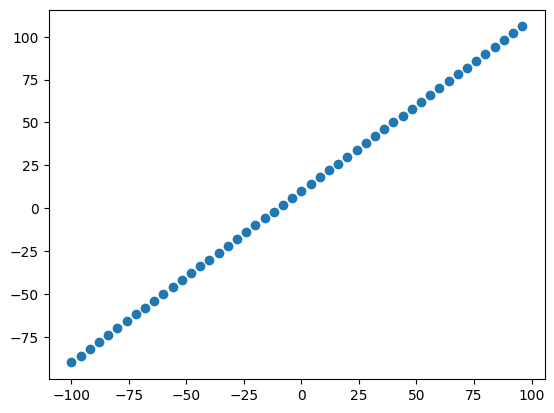

In [16]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

#### Splititing into training and testing sets

In [17]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size=0.33, random_state=42)

In [18]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data

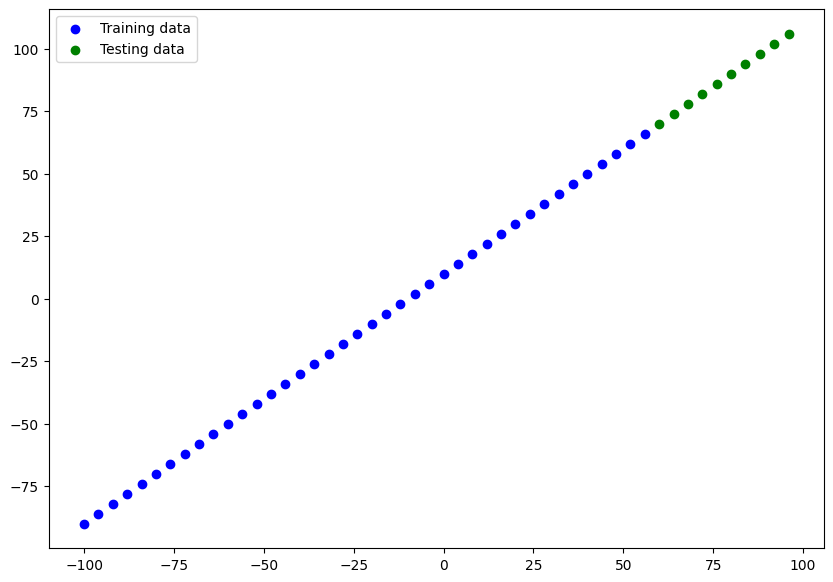

In [19]:
plt.figure(figsize=(10,7))
# Plotting the training data
plt.scatter(X_train, y_train, c = "b", label = "Training data")
# Plotting the testing data
plt.scatter(X_test, y_test, c = "g", label = "Testing data")

plt.legend()

In [20]:
X.shape, X[0]

(TensorShape([50]), <tf.Tensor: shape=(), dtype=int32, numpy=-100>)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1]),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# model.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

/Users/alejandrocortes/opt/miniconda3/envs/alex/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Visualizing the model before fitting the data
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 49.3811 - mae: 49.3811 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24.1580 - mae: 24.1580 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28.0744 - mae: 28.0744 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30.5998 - mae: 30.5998 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.8088 - mae: 9.8088 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.1991 - mae: 18.1991 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.3772 - mae: 9.3772 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.7417 - mae: 18.7417 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.8374 - mae: 23.8374 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.9446 - mae: 13.9446 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.8840 - mae: 19.8840 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.4408 - mae: 15.4408 
Epoch 13/100
2/2 ━━━━━━━━━━━

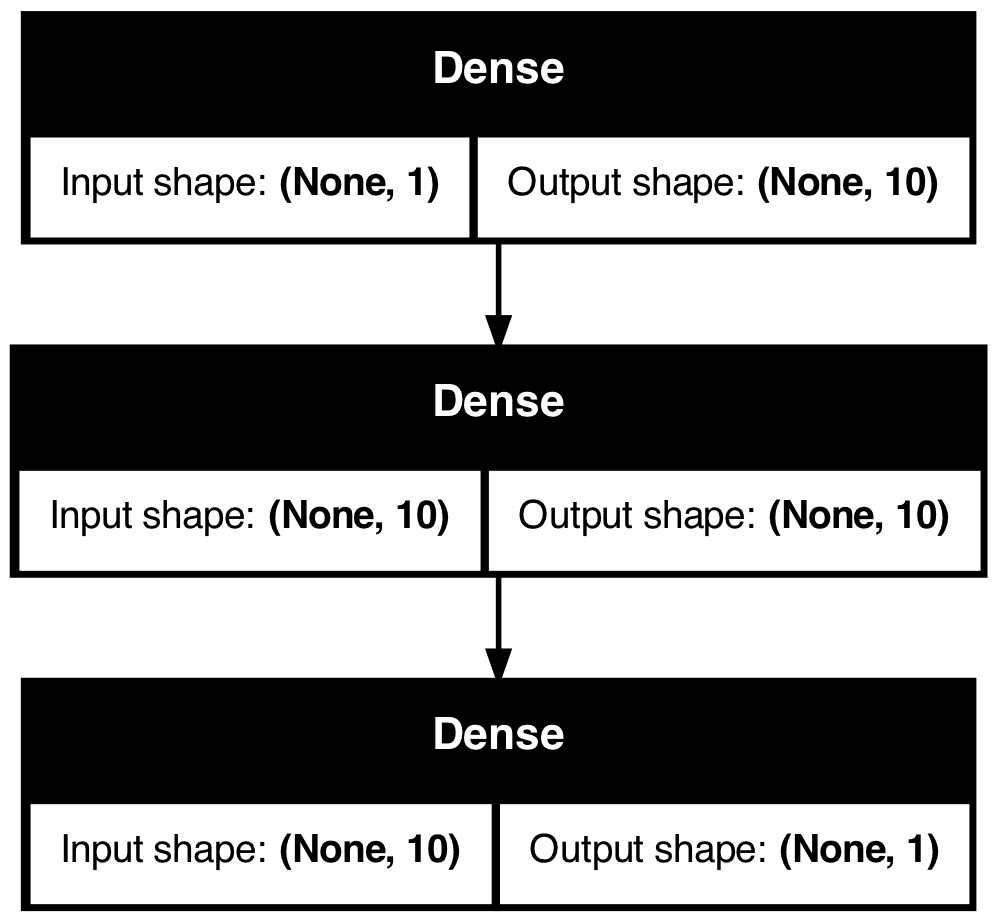

In [24]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

### Visualizing our model's predictions

In [25]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[62.131294],
       [66.1972  ],
       [70.26309 ],
       [74.328995],
       [78.39489 ],
       [82.46079 ],
       [86.52669 ],
       [90.59259 ],
       [94.65849 ],
       [98.72439 ]], dtype=float32)

In [26]:
# Let's create a plotting function

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
    plt.figure(figsize=(8,5))
    plt.scatter(train_data,train_labels,c='b',label = "Training data")
    plt.scatter(test_data,test_labels,c='g',label = "Testing data")
    plt.scatter(test_data,predictions,c='r',label = "Predictions")
    plt.legend()

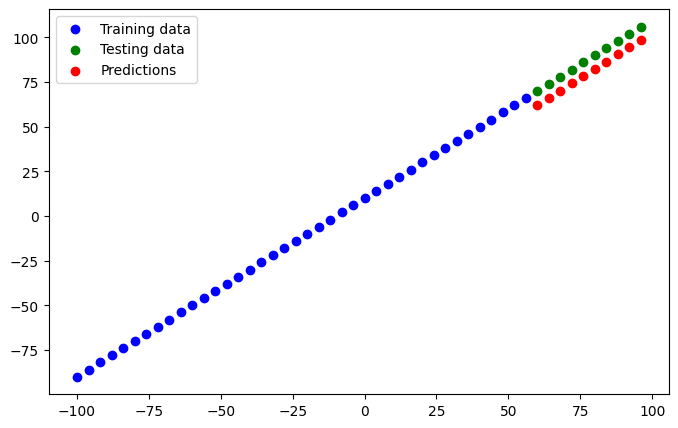

In [27]:
plot_predictions()

### Evaluation Metrics

In [28]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [29]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [30]:
# Evaluate on test data

model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 7.5722 - mae: 7.5722


[7.572157859802246, 7.572157859802246]

In [31]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [32]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[62.131294],
       [66.1972  ],
       [70.26309 ],
       [74.328995],
       [78.39489 ],
       [82.46079 ],
       [86.52669 ],
       [90.59259 ],
       [94.65849 ],
       [98.72439 ]], dtype=float32)>

In [33]:
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(tf.constant(y_pred))) # They have to be the same shape
mae.numpy()

7.5721583

In [34]:
# Calculate the mean square error

mse = tf.metrics.mean_squared_error(y_true = y_test, y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=57.3734>

In [35]:
# Make some function to reuse mae and mse

def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

### Running experiments to improve our model

In [36]:
# Create different experiments to see how changes in the model might result in better or worse results.

In [37]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

#### Build model 1: 1 layer and 100 epochs

In [38]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 29.9741 - mae: 29.9741 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4352 - mae: 9.4352 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.9739 - mae: 10.9739 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.5771 - mae: 7.5771 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.5807 - mae: 8.5807 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.0495 - mae: 10.0495 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.7583 - mae: 11.7583 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.6905 - mae: 8.6905 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.1592 - mae: 10.1592 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.9039 - mae: 11.9039 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.8002 - mae: 8.8002 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.2697 - mae: 10.2697 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


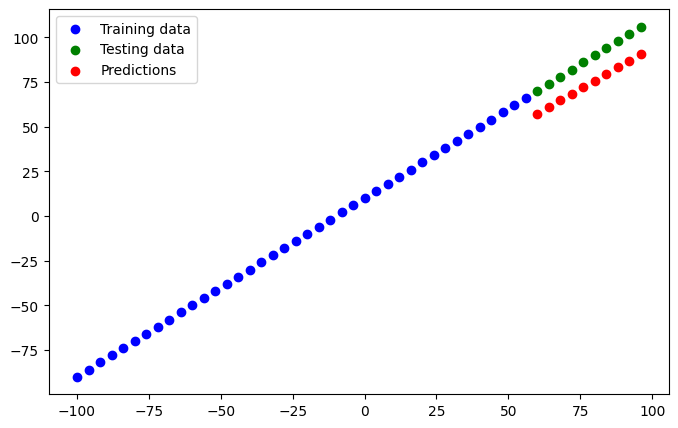

In [39]:
# Make and plot predictions for model 1

y_preds_1 = model.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [40]:
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test,  y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=13.966301>,
 <tf.Tensor: shape=(), dtype=float32, numpy=195.68456>)

#### Model 2: 2 dense layers and 100 epochs

In [41]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mse"])
model_2.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 12.9346 - mse: 219.0673 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.2797 - mse: 739.2691 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3427 - mse: 103.1000
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.8688 - mse: 637.9948 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1834 - mse: 97.5310 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.1387 - mse: 478.8021 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.1430 - mse: 122.7375
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.2209 - mse: 139.1600 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.3301 - mse: 180.2673 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.7741 - mse: 257.7902 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.8740 - mse: 210.6765 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.0488 - mse: 321.7750 
Epoch 13/100
2/2 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


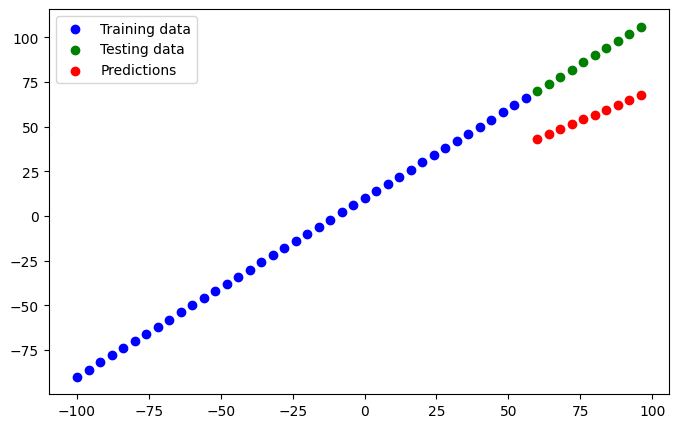

In [42]:
# Make and plot predictions for model 2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [43]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test,  y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=32.540234>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1071.9584>)

### Model 3: 2 layers and 500 epochs

In [44]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model_3.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs = 500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 14.8860 - mae: 14.8860 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.6925 - mae: 24.6925 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.1449 - mae: 23.1449 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.2688 - mae: 19.2688 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.3453 - mae: 17.3453 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.4343 - mae: 16.4343 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.4609 - mae: 11.4609 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.2703 - mae: 15.2703 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.0614 - mae: 16.0614 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.0769 - mae: 12.0769 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.0814 - mae: 15.0814 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.1245 - mae: 11.1245 
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


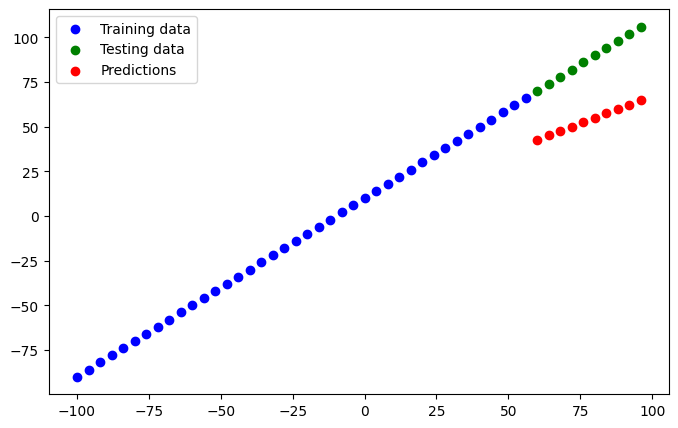

In [45]:
# Make and plot predictions for model 2

y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)

In [46]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test,  y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=34.20605>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1190.3428>)

### Compare our results of our experiments

In [47]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,13.966301,195.684555
1,model_2,32.540234,1071.958374
2,model_3,34.206051,1190.342773


## Saving our model

### Two main formats we can save our model:
* The SavedModel formalt
* The H5 format 

In [48]:
model.save("./models/firstmodel/first_model.keras")

In [49]:
model.save("./models/firstmodel/first_model.h5")

## Loading the model

In [50]:
load_model = tf.keras.models.load_model("./models/firstmodel/first_model.keras")

In [51]:
load_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [52]:
#Compare my model predictions against the saved model predictions

model_preds = model.predict(X_test)
load_model_preds = load_model.predict(X_test)

model_preds, load_model_preds


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


(array([[57.27424 ],
        [60.99856 ],
        [64.722885],
        [68.44721 ],
        [72.17154 ],
        [75.89586 ],
        [79.620186],
        [83.34451 ],
        [87.06883 ],
        [90.79316 ]], dtype=float32),
 array([[57.27424 ],
        [60.99856 ],
        [64.722885],
        [68.44721 ],
        [72.17154 ],
        [75.89586 ],
        [79.620186],
        [83.34451 ],
        [87.06883 ],
        [90.79316 ]], dtype=float32))

In [53]:
model_preds == load_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# A Larger Example

In [54]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [55]:
#Import the insurances csv for the Medical cost dataset. Can be found in:
# https://www.kaggle.com/datasets/mirichoi0218/insurance

insurance = pd.read_csv("./01_data/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [56]:
#One hot encode the categorical values

# insurance = pd.get_dummies(insurance["sex"], prefix = "sex") This gets just the columns

#------------------------------------------------------------------------------------------

#Easier to do it with the function and let get_dummies do it all
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


### Create features and labels

In [57]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [58]:
X.head(), y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [62]:
# Train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [63]:
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [64]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [87]:
# Creating the model:

tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    # tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                        metrics = ["mae"])
history = insurance_model.fit(X_train,y_train,epochs = 200, callbacks= [callback])

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 13266.2686 - mae: 13266.2686
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13063.7402 - mae: 13063.7402
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12538.3330 - mae: 12538.3330
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11556.7949 - mae: 11556.7949
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10224.1465 - mae: 10224.1465
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8898.3184 - mae: 8898.3184
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7910.2065 - mae: 7910.2065
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7490.6196 - mae: 7490.6196
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7406.6899 - mae: 7406.6899
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7375.4316 - mae: 7375.4316
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7352.6729 - mae: 7352.6729
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0

In [88]:
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3621.9221 - mae: 3621.9221 


[3542.401611328125, 3542.401611328125]

#### Improve our model:

##### We did it with the same model as above, but without rewriting more code. We just changed the original code:

##### Changes:

* 1. Changed SGD() to Adam(learning_rate=0.01)
* 2. Increased epochs to 200. (from 100)

### ------------------------------------------------------------------------------------------------

Text(0.5, 0, 'epochs')

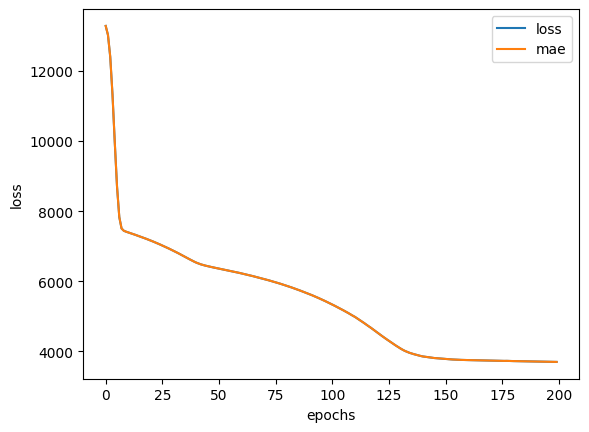

In [89]:
# Plot history

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (Normalization and Standarization)

<Axes: ylabel='Frequency'>

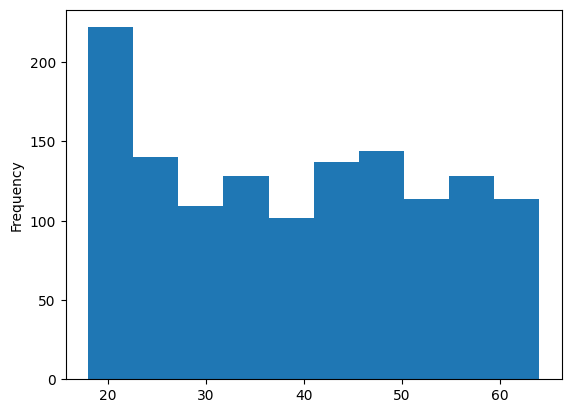

In [91]:
# Visualize a bit

X["age"].plot(kind = "hist")

### Retry with insurance dataset

In [102]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [106]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), #names of columns that need to be normalized
    (OneHotEncoder(handle_unknown="ignore"), ['sex', 'smoker', 'region'])
)
ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [109]:
X = insurance.drop("charges",axis=1)
Y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

#Transform the training data (standarize)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [112]:
# What does it look like now:

X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [113]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

### Build a NN to the standarized data

In [118]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                        metrics = ["mae"])
history = insurance_model.fit(X_train_normal,y_train,epochs = 200, callbacks= [callback])

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 15570.1748 - mae: 15570.1748
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15235.0996 - mae: 15235.0996
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14914.4229 - mae: 14914.4229
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14607.1230 - mae: 14607.1230
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14311.6318 - mae: 14311.6318
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14026.0498 - mae: 14026.0498
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13748.1729 - mae: 13748.1729
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13475.8555 - mae: 13475.8555
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13205.9229 - mae: 13205.9229
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12935.0010 - mae: 12935.0010
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12659.3965 - mae: 12659.3965
Epoch 12/200
34/34 ━━━━━━━━━━━

In [119]:
insurance_model.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3215.3833 - mae: 3215.3833 


[3165.480712890625, 3165.480712890625]